In [94]:
import sys
sys.path.append("..")
from newton.newton import newton
import sympy as sp
import pandas as pd
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt

from IPython.display import Math, Latex, Markdown

In [95]:
# Definimos la función de la cual queremos buscar los ceros

r = sp.symbols('x')
Veff = sp.lambdify(r, (1 / r**2) - (5 / r))
dVeff = sp.lambdify(r, (-1 / r**3) + (5 / r**2))

# Seguidamente también debemos definir su derivada

ddVeff = sp.lambdify(r, sp.diff(dVeff(r), r))

## Representación gráfica

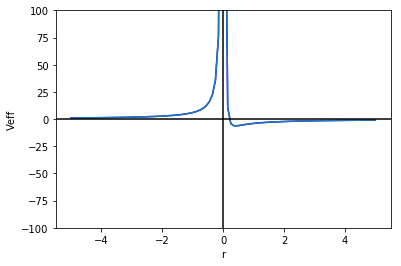

In [96]:
# Potencial efectivo

x_vals = linspace(-5, 5, 100)
y_vals = Veff(x_vals)

plt.plot(x_vals, y_vals, color="b")
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")
plt.ylim([-100, 100])
plt.ylabel("Veff")
plt.xlabel("r")
plt.show()

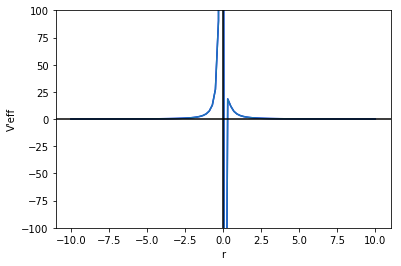

In [97]:
# Derivada potencial efectivo
x_vals = linspace(-10, 10, 100)
y_vals = dVeff(x_vals)

plt.plot(x_vals, y_vals, color="b")
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")
plt.ylim([-100, 100])
plt.ylabel("V'eff")
plt.xlabel("r")
plt.show()

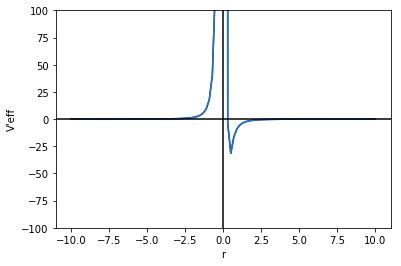

In [98]:
# Segunda derivada potencial efectivo
x_vals = linspace(-10, 10, 100)
y_vals = ddVeff(x_vals)

plt.plot(x_vals, y_vals, color="b")
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")
plt.ylim([-100, 100])
plt.ylabel("V'eff")
plt.xlabel("r")
plt.show()

In [99]:
# Parametros del método de newton. aproximación inicial, tolerancia y numero de iteraciones
p0 = 0.1
tol = 1e-5
N0 = 10

In [100]:
# Aplicamos el algoritmo para encontrar los ceros
p, data, convergence = newton(dVeff, ddVeff, p0, tol, N0)

In [101]:
#######################################
#        Tabulate the data            #
#######################################
pd.set_option('display.precision', 10)
data = pd.DataFrame({'$p_{n-1}$':data['p0_matrix'],
                     '$p_n$' : data['p_matrix'],
                     "$f'(p_{n-1})$" : data['df_matrix'],
                     "$f(p_{n-1})$" : data['f_matrix'],
                     '$Error (p_n-p_{n-1})$': data['error_matrix']
                      })

data.index = np.arange(1, len(data) + 1, 1)
data.index.name = '$n$'
data = data[['$p_n$','$Error (p_n-p_{n-1})$']]

In [102]:
if convergence:
    print('Raíz: ', p, 'con punto inicial', p0, 'y tolerancia', tol, 'después de ', len(data), 'iteraciones.')
    print('')
    display(data)
else:
    print(p)
    display(data)

Raíz:  0.19999999945848104 con punto inicial 0.1 y tolerancia 1e-05 después de  7 iteraciones.



,$p_n$,$Error (p_n-p_{n-1})$
$n$,,
1,0.1250000000,0.0250000000
2,0.1517857143,0.0267857143
3,0.1764737522,0.0246880379
4,0.1932789466,0.0168051945
5,0.1993650846,0.0060861380
6,0.1999939914,0.0006289068
7,0.1999999995,0.0000060081


In [103]:
# Guardamos los datos tabulados como un archivo de latex
data.to_latex("latex/newton-raphson/newton_general-sem1e-1.tex")
data.to_csv("csv/newton-raphson/newton_general-sem1e-1.csv", index = None, header = True)